In [1]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.linear_model import LinearRegression  # For linear regression modeling
import numpy as np  # For numerical operations
from sklearn.impute import SimpleImputer # For checking NaN values
from sklearn.model_selection import train_test_split # For data splitting

# Import data from .xlsx file
dataset = pd.read_excel('Real estate valuation data set.xlsx')

# Display a preview of the dataset to verify successful import and understand its structure
dataset

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [2]:
# Display the summary statistics of the dataset for initial insights
dataset.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


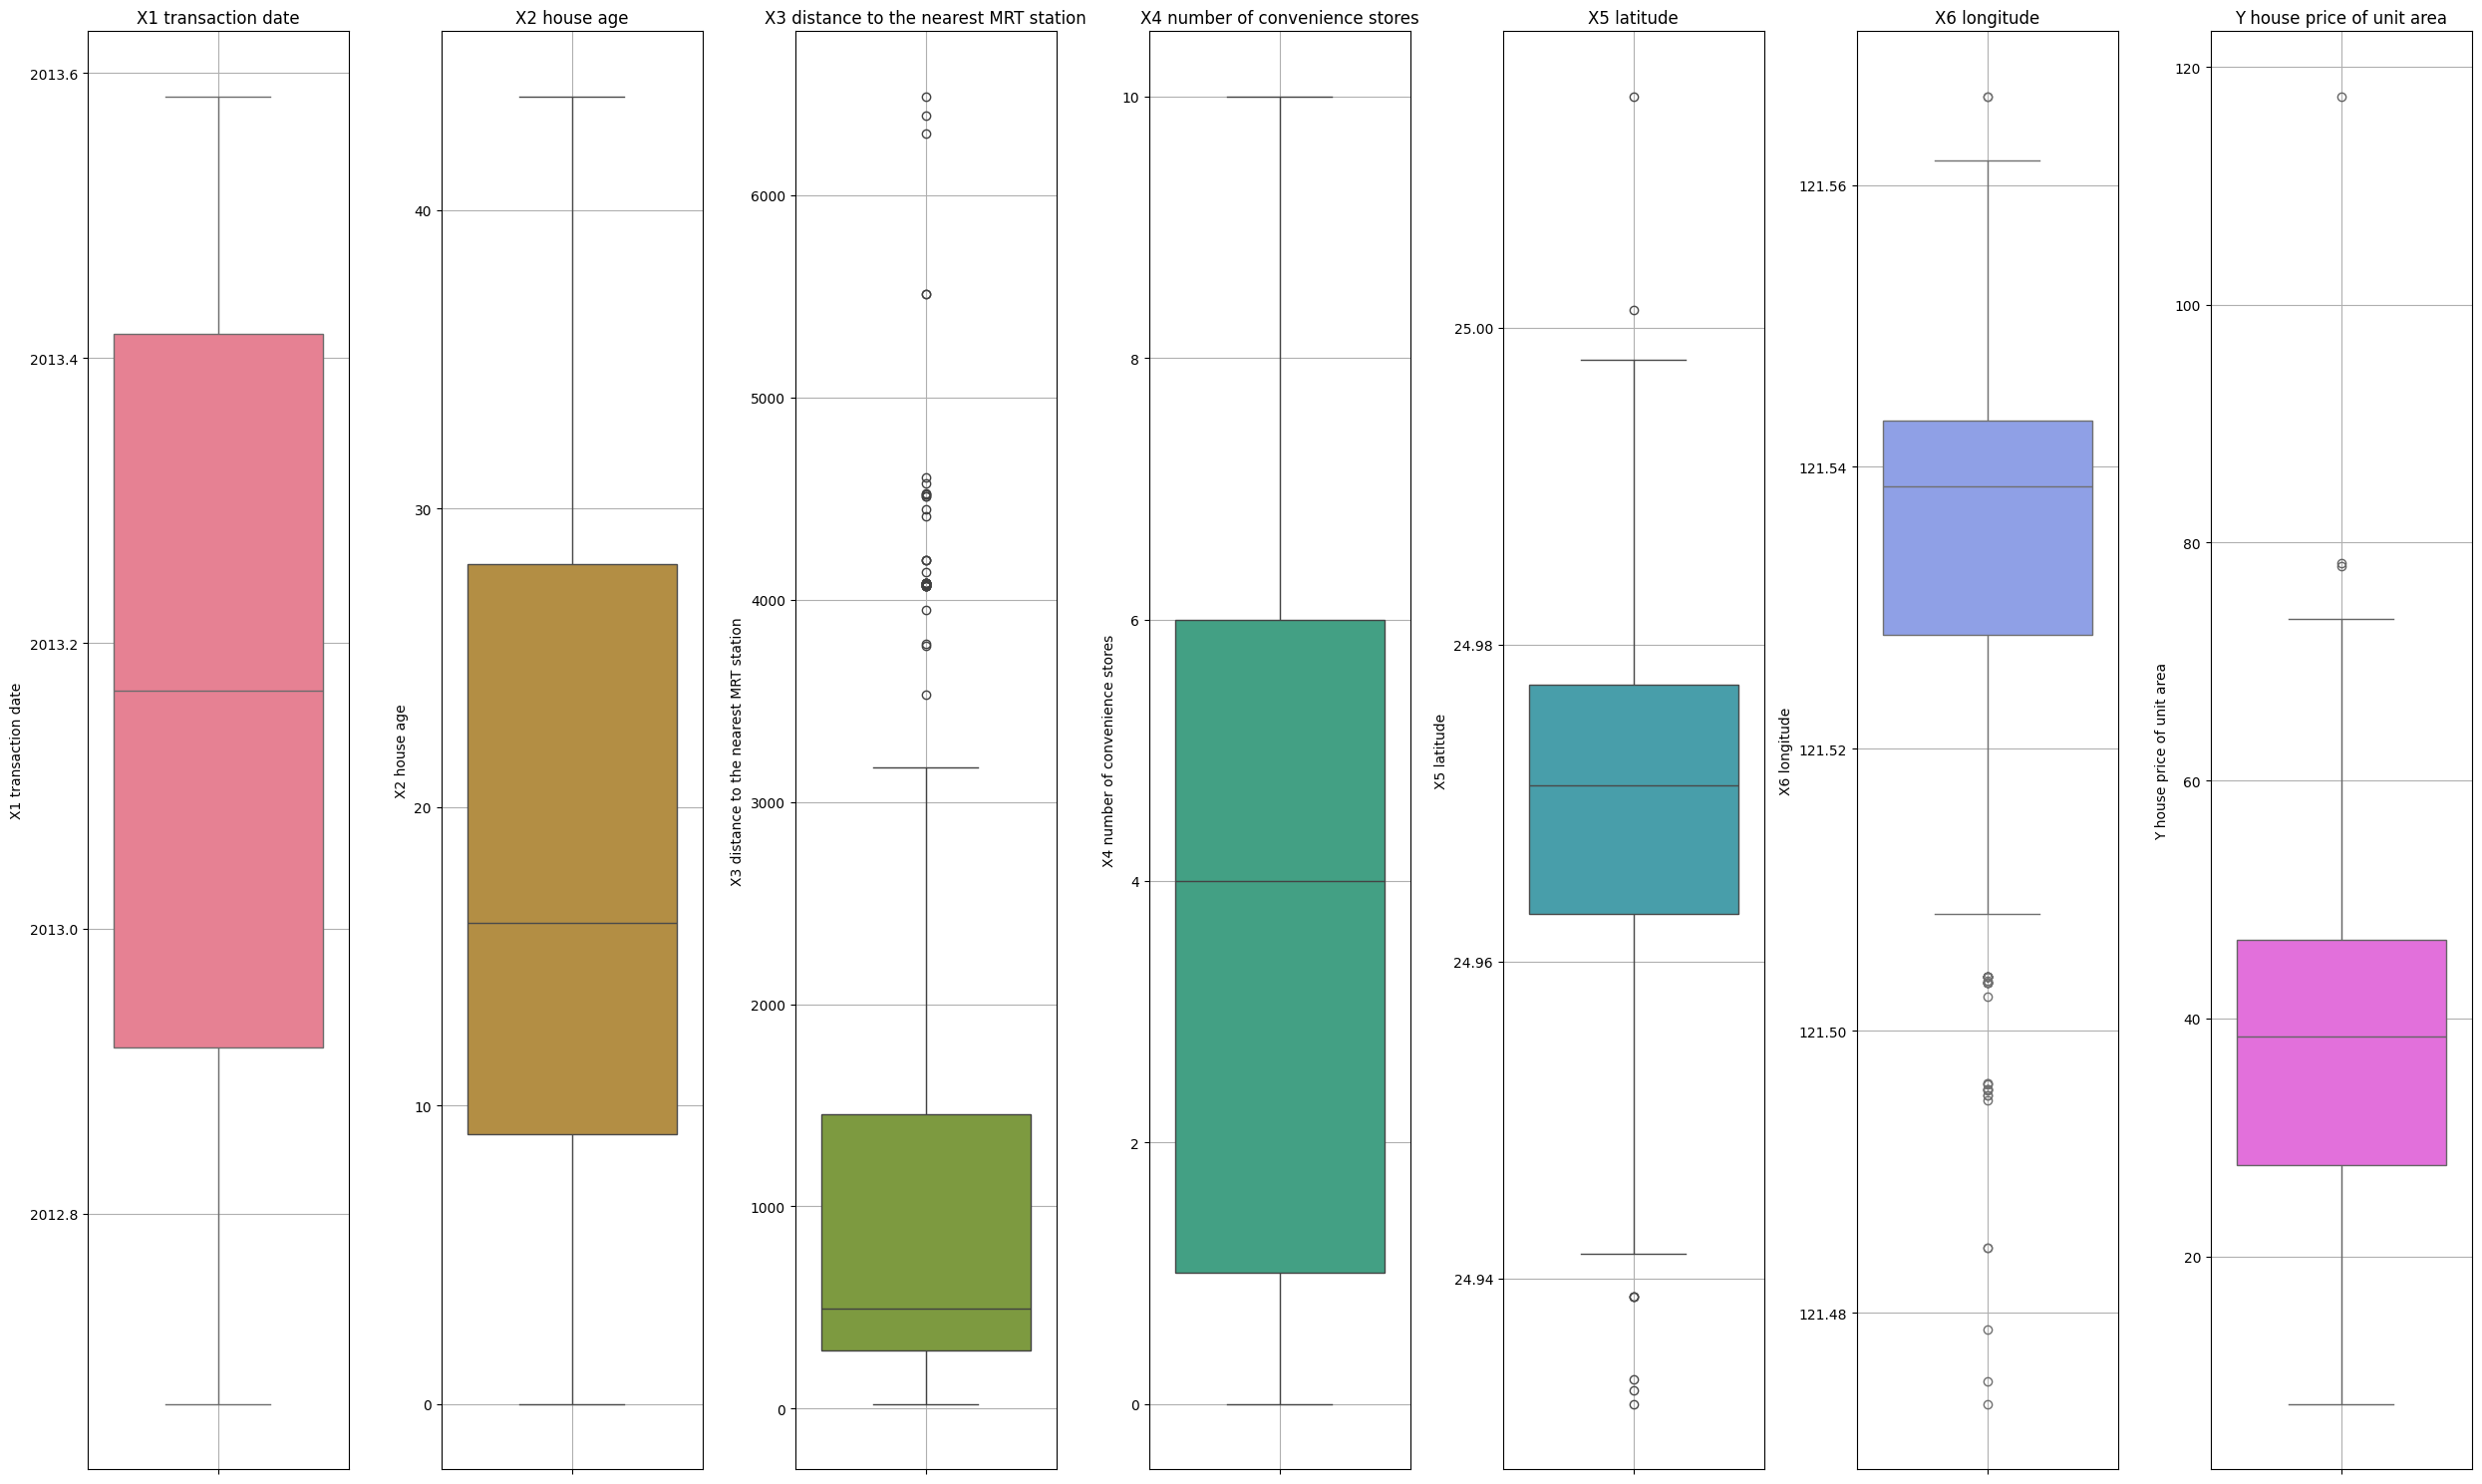

In [3]:
# Set the overall figure size for the subplots
plt.figure(figsize=(25, 15))

# Get the list of column names
feature_columns = dataset.columns

# Generate a list of colors for the boxplots
colors = sns.color_palette('husl', len(feature_columns))  # Using 'husl' palette for better color differentiation

# Create a subplot for each feature in the dataset
for i, feature in enumerate(feature_columns, 1):
    # Create subplots in a single row
    plt.subplot(1, len(feature_columns), i)  
    # Create a boxplot for the current feature with the specified color
    sns.boxplot(y=dataset[feature], color=colors[i-1])
    # Set the title of the subplot to the feature name
    plt.title(feature)
    # Add grid lines to the subplot
    plt.grid(True)
    # Adjust the layout to prevent overlap
    plt.tight_layout()

# Display all the subplots
plt.show()

                                        X1 transaction date  X2 house age  \
X1 transaction date                                1.000000      0.017542   
X2 house age                                       0.017542      1.000000   
X3 distance to the nearest MRT station             0.060880      0.025622   
X4 number of convenience stores                    0.009544      0.049593   
X5 latitude                                        0.035016      0.054420   
X6 longitude                                      -0.041065     -0.048520   
Y house price of unit area                         0.087529     -0.210567   

                                        X3 distance to the nearest MRT station  \
X1 transaction date                                                   0.060880   
X2 house age                                                          0.025622   
X3 distance to the nearest MRT station                                1.000000   
X4 number of convenience stores                        

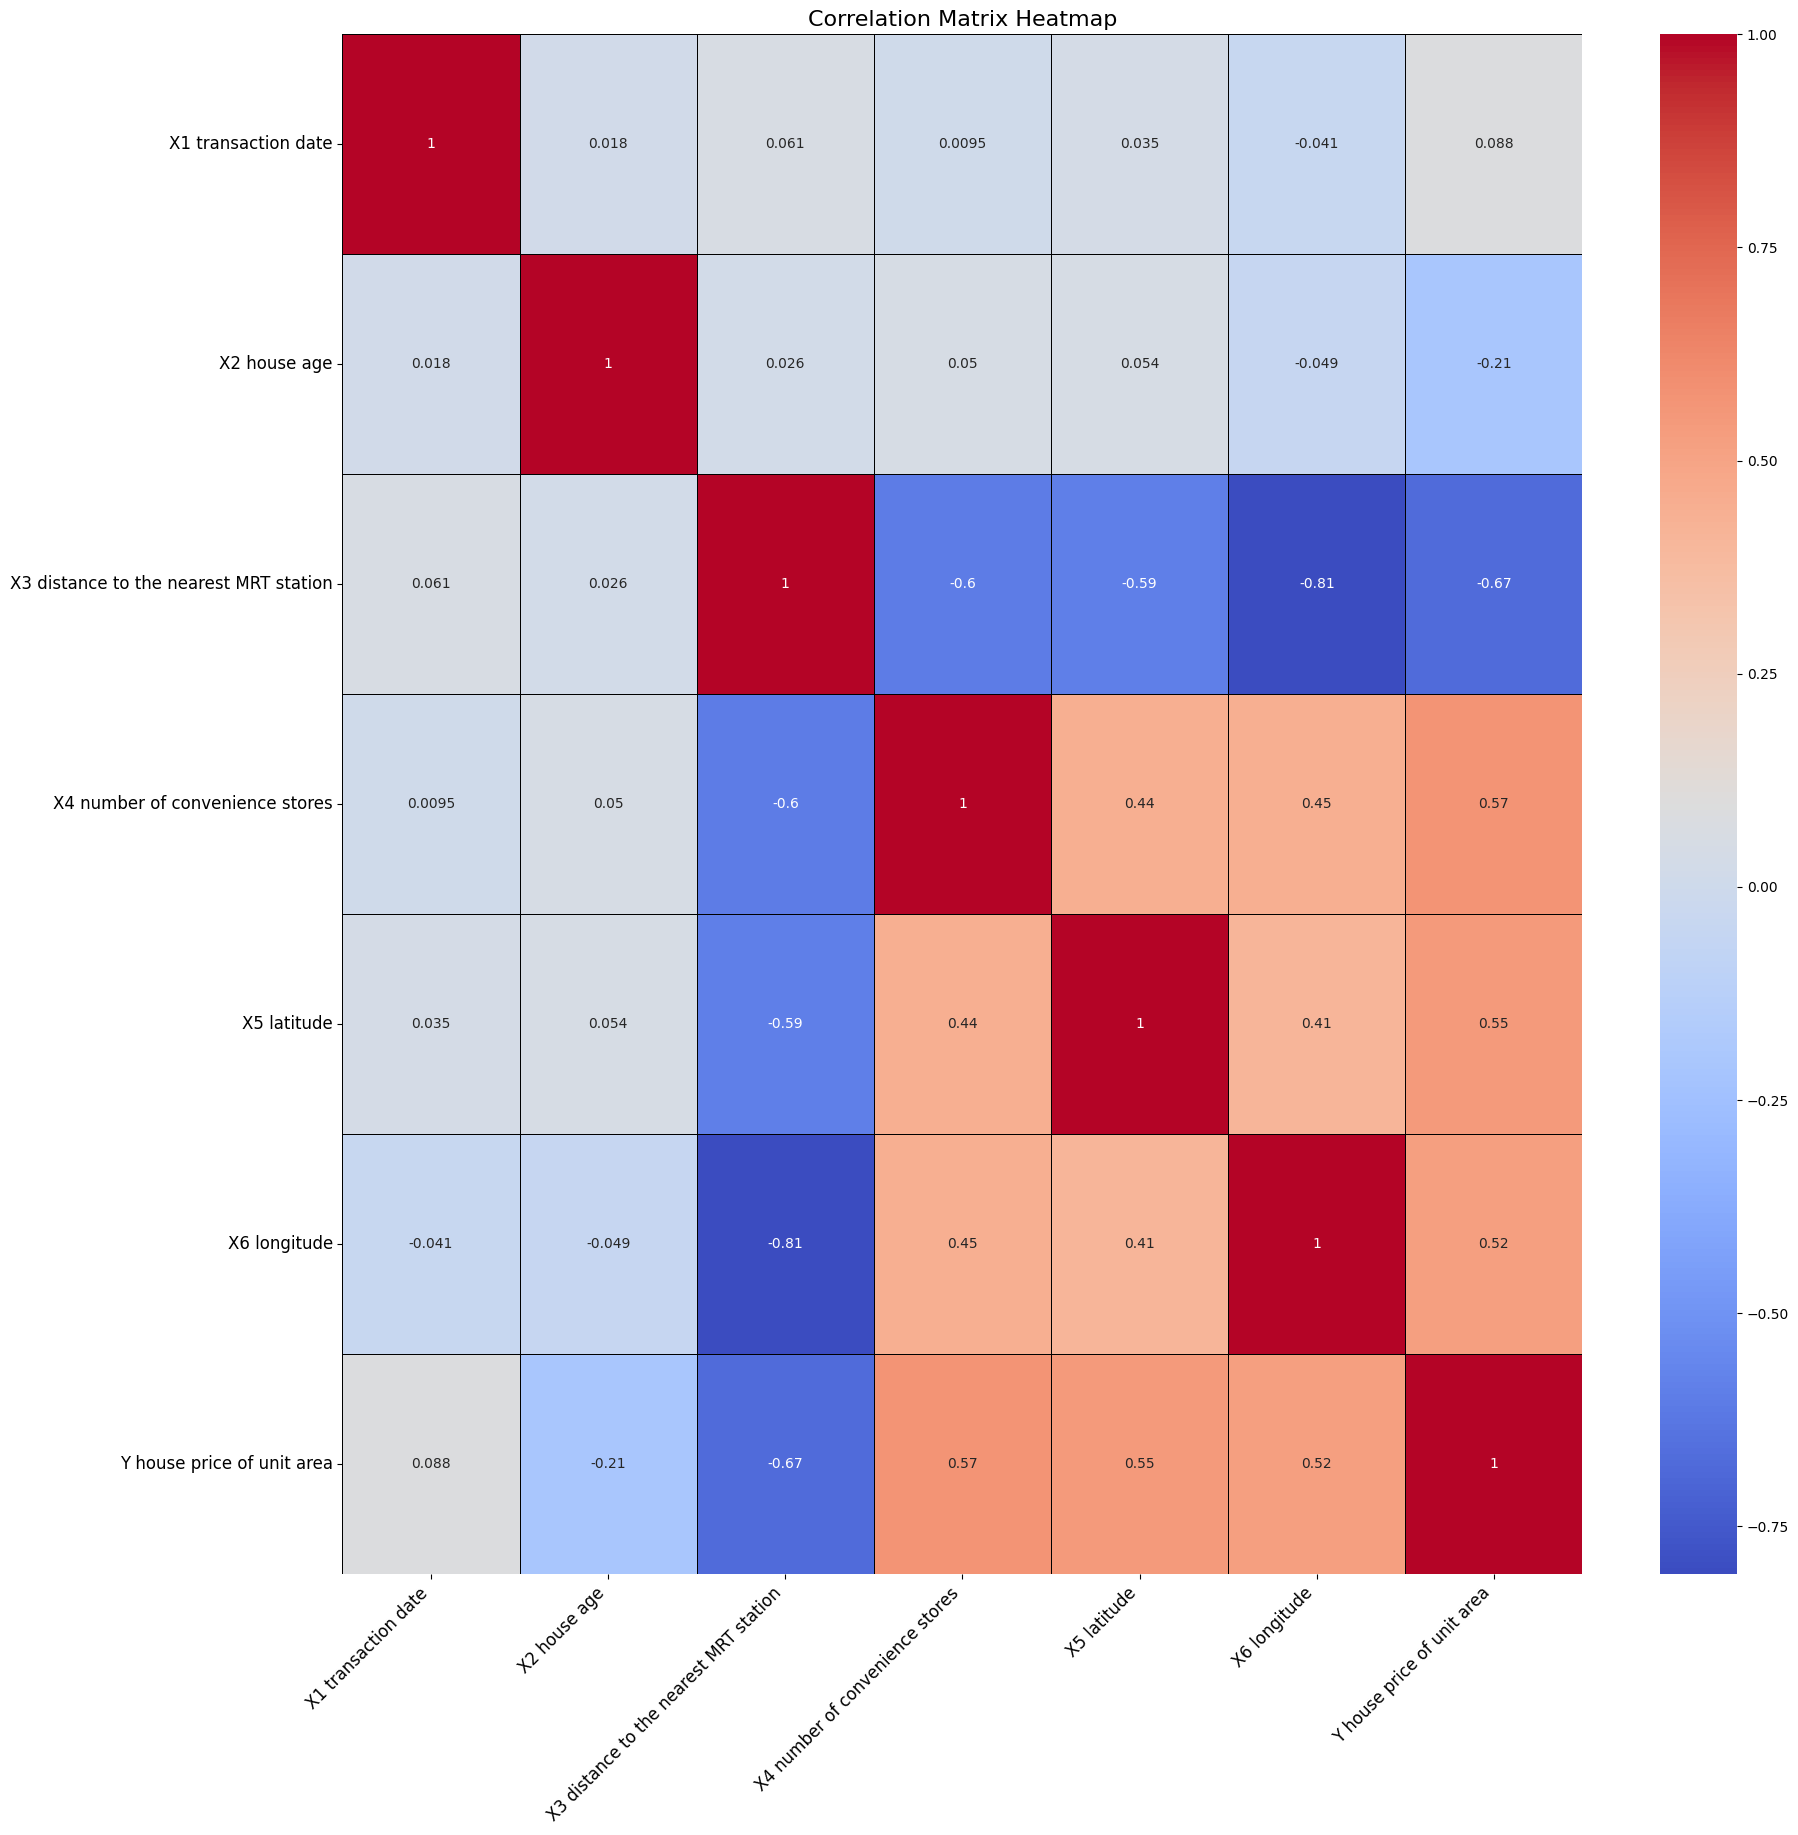

In [4]:
# Calculate the correlation matrix for the filtered dataset
correlation_matrix = dataset.corr()

# Printing the numerical version of correlation matrix
print(correlation_matrix)

# Set the overall figure size for the heatmap
plt.figure(figsize=(20,20))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Rotate the labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Set the title for the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()

                                        X1 transaction date  X2 house age  \
X1 transaction date                                     1.0           0.0   
X2 house age                                            0.0           1.0   
X3 distance to the nearest MRT station                  0.0           0.0   
X4 number of convenience stores                         0.0           0.0   
X5 latitude                                             0.0           0.0   
X6 longitude                                            0.0           0.0   
Y house price of unit area                              0.0           0.0   

                                        X3 distance to the nearest MRT station  \
X1 transaction date                                                        0.0   
X2 house age                                                               0.0   
X3 distance to the nearest MRT station                                     1.0   
X4 number of convenience stores                        

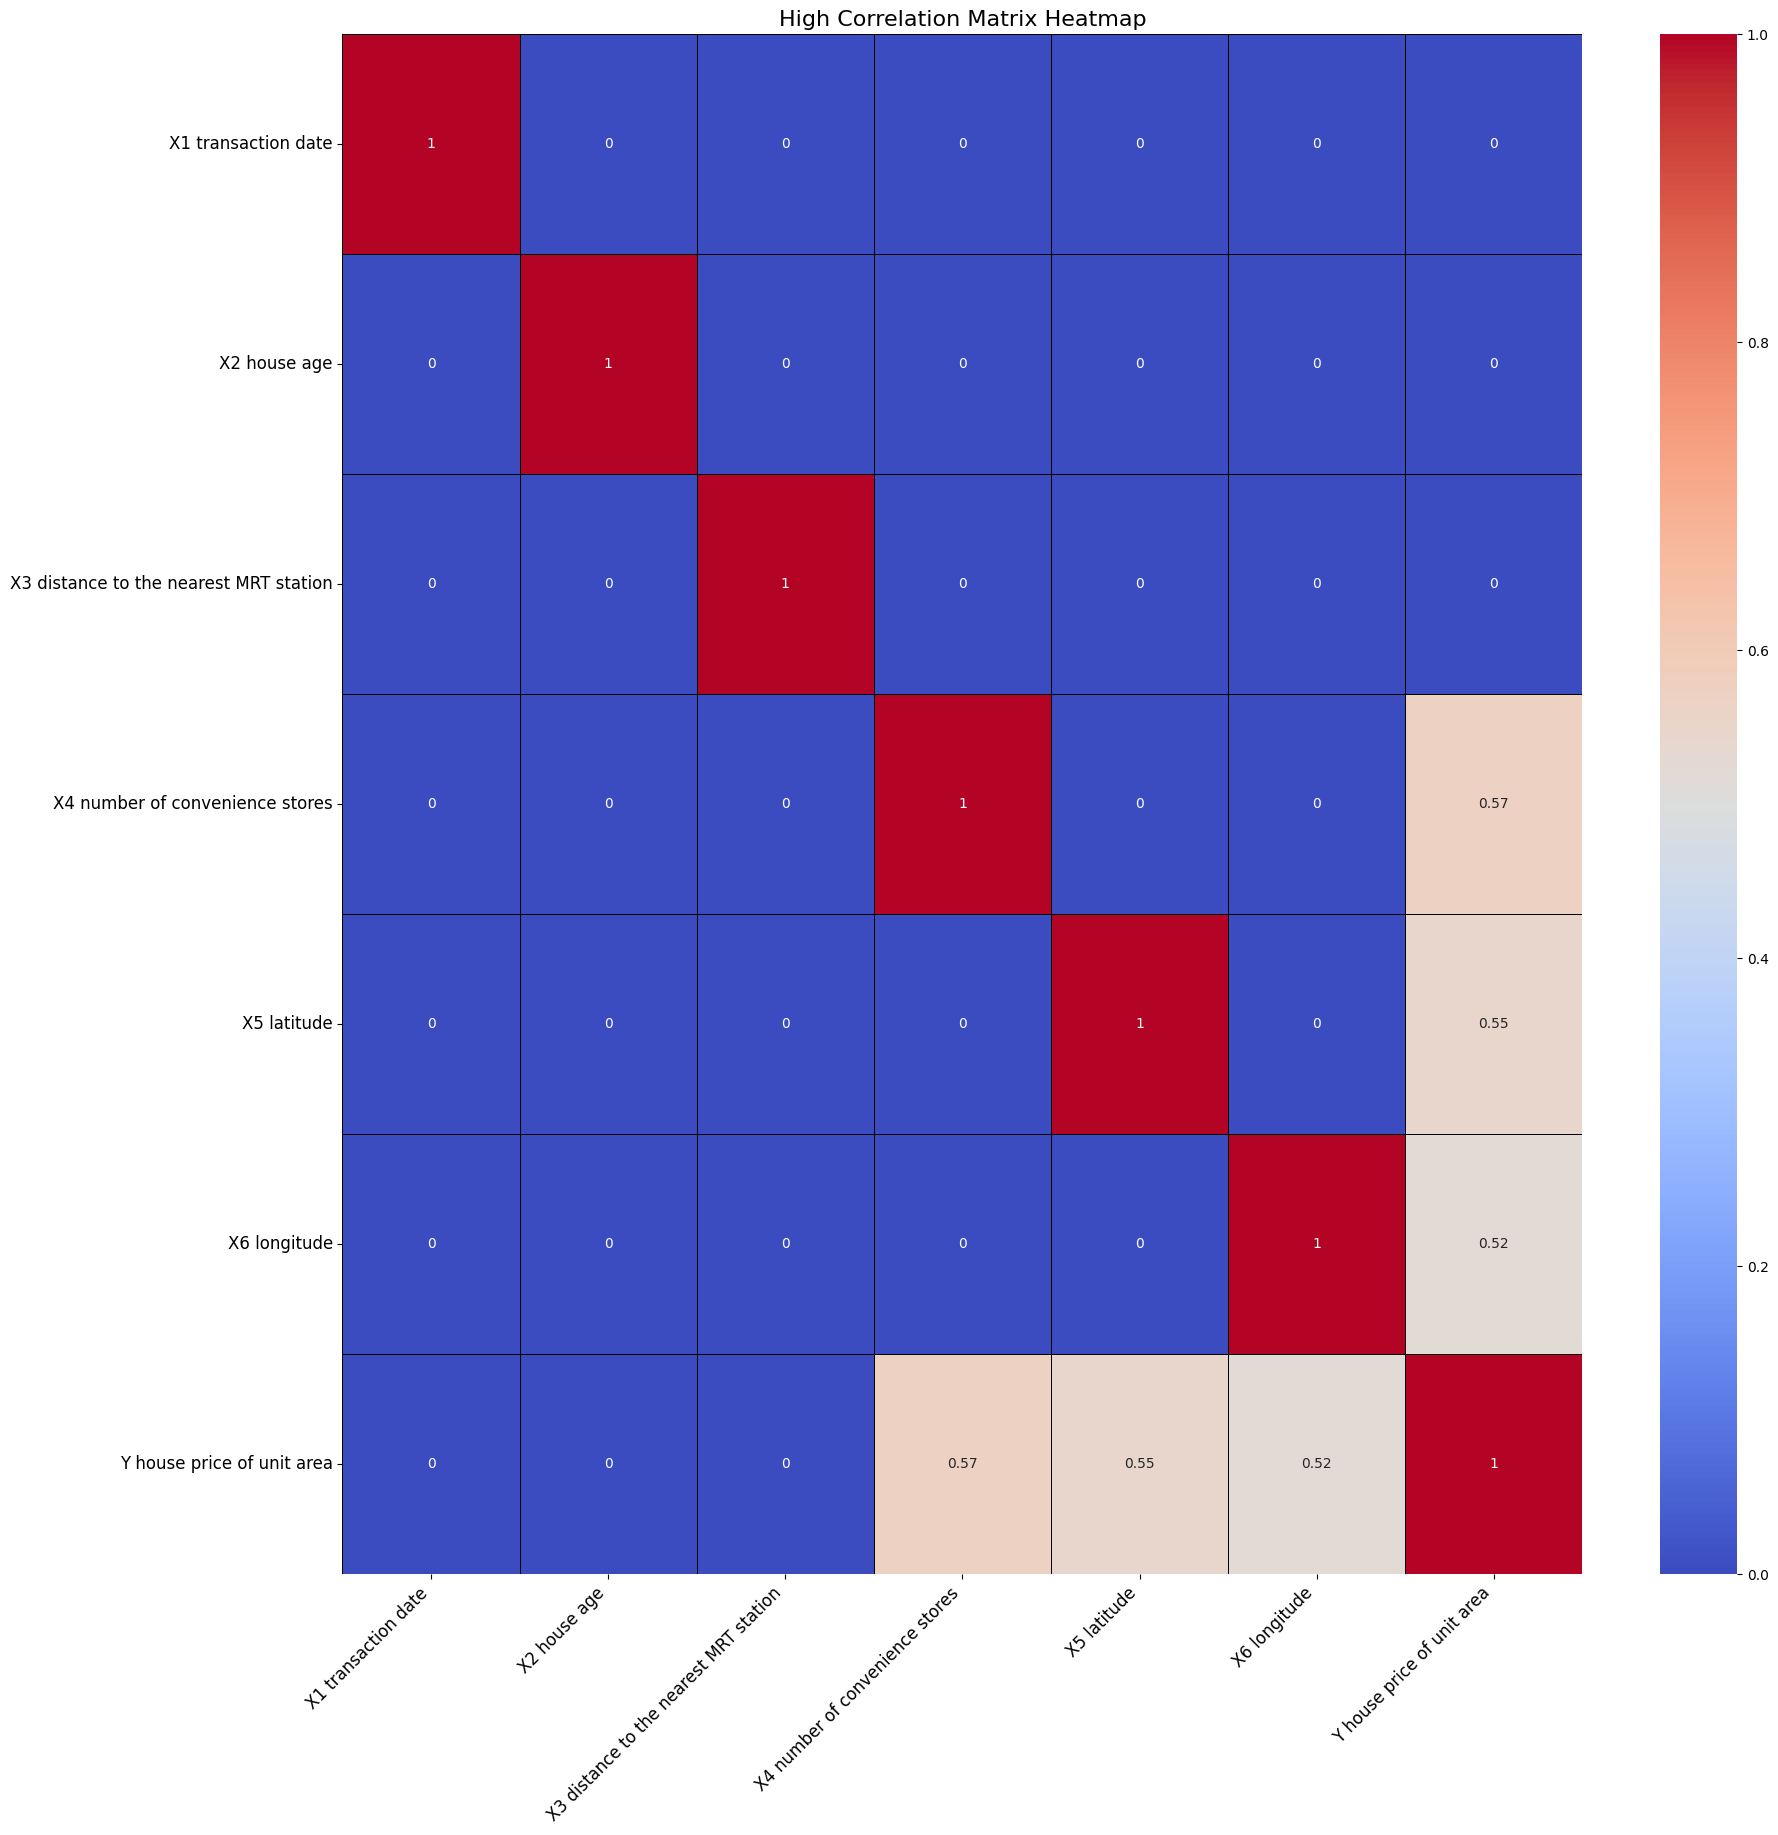

In [5]:
# Filter the correlation matrix for values greater than 0.5
high_correlation = correlation_matrix[(correlation_matrix > 0.5)]

# Replace NaN values with 0
high_correlation = high_correlation.fillna(0)

# Print the filtered correlation matrix
print(high_correlation)

# Set the overall figure size for the heatmap
plt.figure(figsize=(20,20))

# Create a heatmap to visualize the filtered correlation matrix
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Rotate the labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Set the title for the heatmap
plt.title('High Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()

In [6]:
# Select correlations involving 'Y house price of unit area'
house_price_correlations = correlation_matrix[['Y house price of unit area']]

# Filter the correlations to keep only values greater than 0.25
house_price_positive_correlations_above_25 = house_price_correlations[(house_price_correlations['Y house price of unit area'] > 0.25)]

# Extract the header values into a variable
correlated_headers = house_price_positive_correlations_above_25.index.tolist()

# Subset the filtered_year_dataset to keep only the columns with high correlations with 'Y house price of unit area'
house_price_correlated_dataset  = dataset[correlated_headers]

# Display the resulting dataset
house_price_correlated_dataset 

,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,10,24.98298,121.54024,37.9
1,9,24.98034,121.53951,42.2
2,5,24.98746,121.54391,47.3
3,5,24.98746,121.54391,54.8
4,5,24.97937,121.54245,43.1
...,...,...,...,...
409,0,24.94155,121.50381,15.4
410,9,24.97433,121.54310,50.0
411,7,24.97923,121.53986,40.6
412,5,24.96674,121.54067,52.5


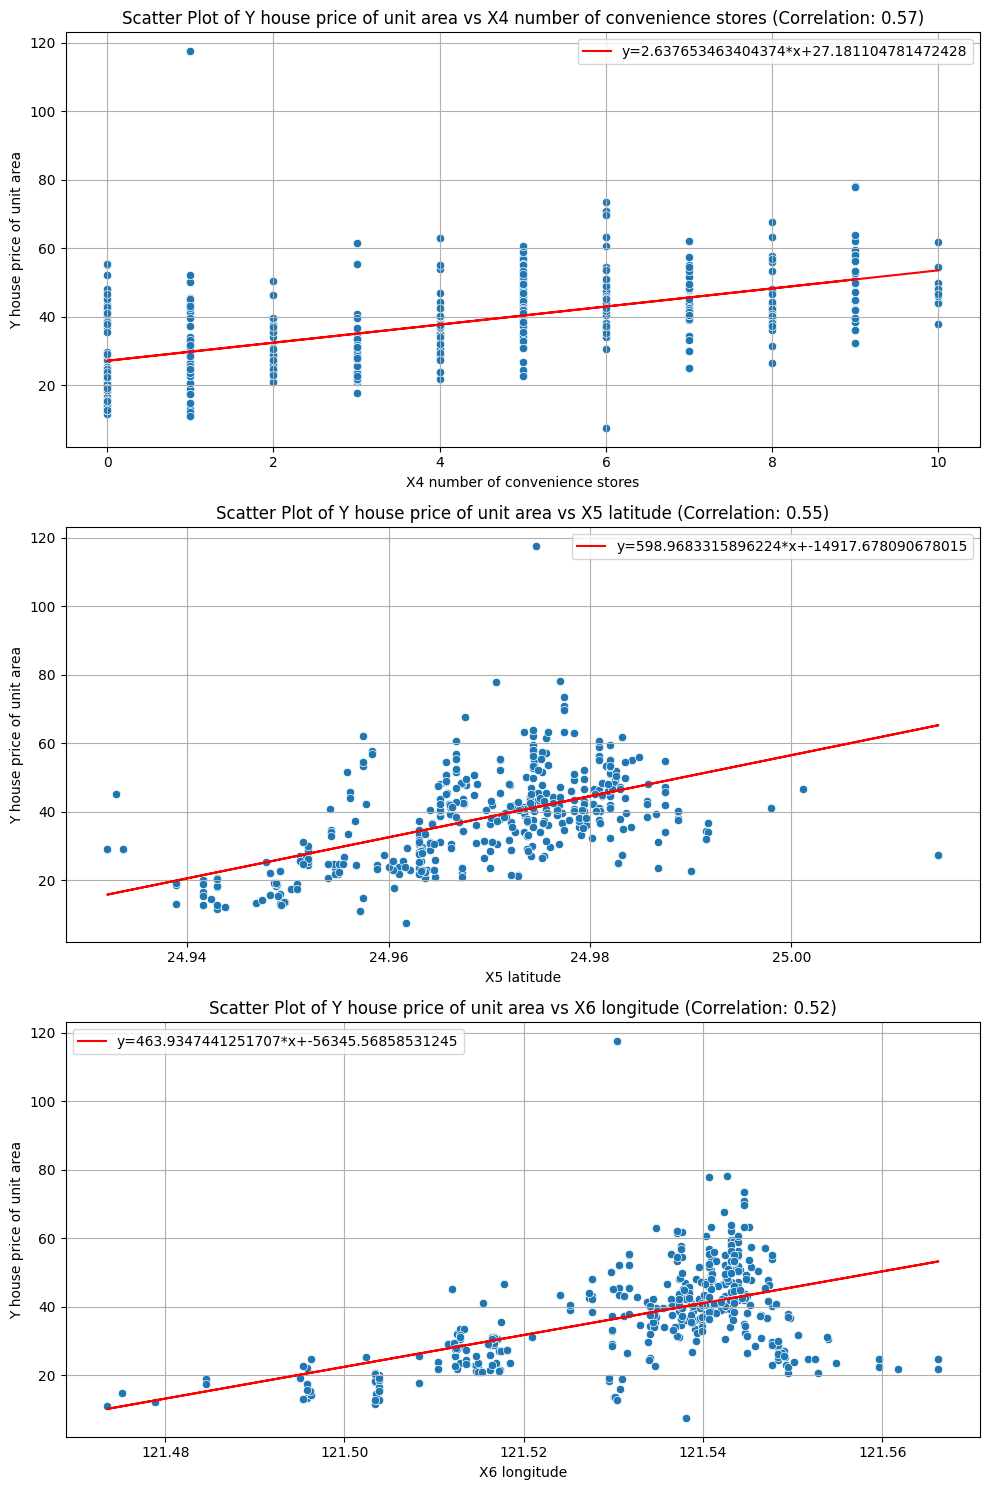

In [7]:
# Calculate the number of features (excluding 'Y house price of unit area') for the subplot grid
num_features = len(correlated_headers) - 1

# Create a figure with subplots
plt.figure(figsize=(10, 5 * num_features)) # Adjust figure size based on the number of features
subplot_index = 1  # Initialize subplot index counter

# Initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Loop through each feature to create scatter plots against Y house price of unit area
for feature in correlated_headers:
    if feature == 'Y house price of unit area':
        continue # Skip 'Y house price of unit area' as we don't need to plot it against itself
    
    plt.subplot(num_features, 1, subplot_index) # Create subplot for current feature
    sns.scatterplot(x=dataset[feature], y=dataset['Y house price of unit area']) # Scatter plot of Y house price of unit area vs feature

    # Calculate the linear regression
    X = house_price_correlated_dataset [feature].values.reshape(-1, 1) # Independent variable
    y = house_price_correlated_dataset ['Y house price of unit area'].values.reshape(-1, 1) # Dependent variable

    # Apply the imputer to handle any missing values
    X_imputed = imputer.fit_transform(X)
    y_imputed = imputer.fit_transform(y)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_imputed, y_imputed)
    
    # Extract the slope (coefficient) and intercept
    slope = model.coef_[0][0]  
    intercept = model.intercept_[0]  

    # Add the regression line to the plot
    plt.plot(dataset[feature], model.predict(X_imputed), 'r', label=f'y={slope}*x+{intercept}')

    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(X_imputed.flatten(), y_imputed.flatten())[0, 1]

    # Add the correlation coefficient to the plot title
    plt.title(f'Scatter Plot of Y house price of unit area vs {feature} (Correlation: {correlation_coefficient:.2f})')
    
    subplot_index += 1  # Increment subplot index counter only for valid plots

    plt.legend()  # Add legend to the plot
    plt.grid(True)  # Add grid to the plot

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show() 

In [8]:
# Extracting features (independent variables) from the dataset
X = dataset.iloc[:, :-1].values

# Extracting the target variable (dependent variable) from the dataset
Y = dataset.iloc[:, -1].values

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split( X
                                                    , Y
                                                    , test_size = 0.2
                                                    , random_state = 0)

In [10]:
def train_and_print_model_coefficients(model, X_train, Y_train):    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Print coefficients
    print('Coefficients:\n', model.coef_)
    
    # Print intercept
    print('\nIntercept:\n', model.intercept_)

In [11]:
def predict_and_print_comparison(model, X_test, Y_test):    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Set print options
    np.set_printoptions(precision=2)
    
    # Print predictions and actual values
    print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

In [12]:
def print_r_squared_values(model, X_train, Y_train, X_test, Y_test):
    # Calculate R-squared value for the training data
    r_squared_train = model.score(X_train, Y_train)
    print('R-squared value for the training set:', r_squared_train)
    
    # Calculate R-squared value for the test data
    r_squared_test = model.score(X_test, Y_test)
    print('R-squared value for the test set:', r_squared_test)

In [13]:
train_and_print_model_coefficients(model, X_train, Y_train)

Coefficients:
 [ 5.02223987e+00 -2.63131890e-01 -4.46354435e-03  1.09259467e+00
  2.25488372e+02 -6.81792744e+00]

Intercept:
 -14869.075933333066


In [14]:
predict_and_print_comparison(model, X_test, Y_test)

[[40.1  45.3 ]
 [12.84 14.4 ]
 [42.01 46.  ]
 [12.65 15.6 ]
 [42.44 50.2 ]
 [39.83 38.1 ]
 [40.56 48.5 ]
 [33.86 41.4 ]
 [49.37 51.6 ]
 [45.87 40.1 ]
 [45.86 42.  ]
 [40.65 42.4 ]
 [39.51 28.5 ]
 [40.05 39.1 ]
 [47.12 53.7 ]
 [38.14 36.8 ]
 [40.08 40.6 ]
 [41.13 55.2 ]
 [40.84 39.3 ]
 [42.38 44.3 ]
 [49.7  53.5 ]
 [31.08 25.3 ]
 [39.67 22.8 ]
 [45.53 51.7 ]
 [46.19 45.5 ]
 [43.43 34.4 ]
 [46.36 31.6 ]
 [26.21 25.9 ]
 [48.14 49.5 ]
 [21.54 24.7 ]
 [44.81 51.7 ]
 [34.94 29.7 ]
 [42.67 45.4 ]
 [38.38 50.5 ]
 [43.98 26.5 ]
 [32.28 30.1 ]
 [47.62 46.1 ]
 [39.78 28.9 ]
 [52.56 54.4 ]
 [ 7.47 15.  ]
 [52.54 44.9 ]
 [33.13 29.8 ]
 [34.22 23.6 ]
 [49.59 48.  ]
 [15.38 16.7 ]
 [43.36 40.9 ]
 [42.41 40.2 ]
 [13.   12.9 ]
 [33.99 21.3 ]
 [48.5  62.1 ]
 [53.67 63.9 ]
 [38.73 40.3 ]
 [47.74 42.2 ]
 [25.42 19.1 ]
 [30.69 28.4 ]
 [34.27 28.5 ]
 [48.91 60.7 ]
 [40.62 37.5 ]
 [43.46 39.3 ]
 [32.95 28.8 ]
 [43.85 42.3 ]
 [43.63 44.3 ]
 [39.55 42.6 ]
 [47.02 57.4 ]
 [36.84 42.2 ]
 [30.01 25.7 ]
 [ 9.66 13

In [15]:
print_r_squared_values(model, X_train, Y_train, X_test, Y_test)

R-squared value for the training set: 0.5648155773967325
R-squared value for the test set: 0.6573567291828575


In [16]:
print(f'y={slope}*x+{intercept}')

y=463.9347441251707*x+-56345.56858531245


In [17]:
def display_features(features):
    for index, feature in enumerate(features, start=1):
        # Print each feature with its corresponding index
        print(f"[{index}] {feature}")

In [18]:
# Flag to control the while loop for invalid input
invalid_input = True

# Initialize headers with the list of feature names, excluding the last column
headers = dataset.iloc[:, :-1].columns.tolist()

# Initialize an empty list for regression features
regression_features = []

# Flag to indicate delete mode 
delete_mode = False

# Loop to handle user input until valid input is received
while invalid_input:
    try:
        if delete_mode:
            # If in delete mode
            if regression_features:
                # If there are features to remove
                print("Please pick from the following features to remove")
                display_features(regression_features)

                # Prompt for removing features
                prompt = f"Enter a number (1-{len(regression_features)}) press [N] to go back: "
            else:
                # If no features to remove, exit delete mode
                delete_mode = False
                continue
        else:
            # If not in delete mode
            if headers:
                # If there are headers to select
                print("Please pick from the following features for regression analysis")
                display_features(headers) # Display the list of available headers

                # Prompt for adding features or switching to delete mode
                prompt = f"Enter a number (1-{len(headers)}) press [N] to end or [R] to remove features: "
            else:
                # If no headers left to select, exit the loop
                prompt = f"Enter a number (1-{len(headers)}): "
                break

        # Get user input for the feature selection or deletion
        regression_feature_input = input(f"Enter a number (1-{len(headers)}): " if not regression_features else prompt).lower()
        
        # Check if the user wants to end the input process
        if regression_feature_input == 'n':
            if delete_mode:
                delete_mode = False
                continue
            else:
                break

        # Check if the user wants to remove features they selected
        if regression_feature_input == 'r':
            delete_mode = True
            continue

        # Attempt to convert the user input to an integer
        regression_feature_input = int(regression_feature_input)

        # Check if the input is within the valid range
        if not 1 <= regression_feature_input <= len(headers):
            # Prompt the user to enter a valid number within the specified range
            print(f"Invalid input. Please enter a number between 1 and {len(headers)}.")
        elif not delete_mode:
            # Append the selected feature to regression_features and remove it from headers
            regression_features.append(headers.pop(regression_feature_input-1))

            # Reconstruct regression_features to ensure it is properly sorted
            regression_features = [item for item in dataset.iloc[:, :-1].columns.tolist() if item not in headers]
        else:
            # Remove the selected feature from regression_features
            regression_features.pop(regression_feature_input-1)

            # Reconstruct headers to ensure it is properly sorted
            headers = [item for item in dataset.iloc[:, :-1].columns.tolist() if item not in regression_features]
            
    except ValueError:
        # Handle the case where the input cannot be converted to an integer
        print("Invalid input. Please enter a valid number")     

Please pick from the following features for regression analysis
[1] X1 transaction date
[2] X2 house age
[3] X3 distance to the nearest MRT station
[4] X4 number of convenience stores
[5] X5 latitude
[6] X6 longitude
Please pick from the following features for regression analysis
[1] X2 house age
[2] X3 distance to the nearest MRT station
[3] X4 number of convenience stores
[4] X5 latitude
[5] X6 longitude
Please pick from the following features for regression analysis
[1] X3 distance to the nearest MRT station
[2] X4 number of convenience stores
[3] X5 latitude
[4] X6 longitude


In [19]:
# Extracting user-specified features (independent variables) from the dataset
X = dataset[regression_features].values

# Extracting the target variable (dependent variable) from the dataset
Y = dataset.iloc[:, -1].values

In [20]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split( X
                                                    , Y
                                                    , test_size = 0.2
                                                    , random_state = 0)

In [21]:
train_and_print_model_coefficients(model, X_train, Y_train)

Coefficients:
 [ 3.01 -0.27]

Intercept:
 -6023.295669654153


In [22]:
predict_and_print_comparison(model, X_test, Y_test)

[[38.91 45.3 ]
 [36.71 14.4 ]
 [33.87 46.  ]
 [36.28 15.6 ]
 [39.81 50.2 ]
 [32.54 38.1 ]
 [33.26 48.5 ]
 [33.03 41.4 ]
 [40.61 51.6 ]
 [38.8  40.1 ]
 [39.35 42.  ]
 [38.85 42.4 ]
 [38.26 28.5 ]
 [33.25 39.1 ]
 [40.45 53.7 ]
 [34.24 36.8 ]
 [33.88 40.6 ]
 [41.7  55.2 ]
 [38.43 39.3 ]
 [32.53 44.3 ]
 [39.65 53.5 ]
 [39.45 25.3 ]
 [33.83 22.8 ]
 [38.09 51.7 ]
 [41.38 45.5 ]
 [37.89 34.4 ]
 [38.53 31.6 ]
 [32.97 25.9 ]
 [41.49 49.5 ]
 [38.91 24.7 ]
 [42.6  51.7 ]
 [38.81 29.7 ]
 [41.7  45.4 ]
 [34.29 50.5 ]
 [37.16 26.5 ]
 [40.15 30.1 ]
 [33.72 46.1 ]
 [41.82 28.9 ]
 [40.11 54.4 ]
 [36.83 15.  ]
 [43.46 44.9 ]
 [31.61 29.8 ]
 [37.39 23.6 ]
 [34.96 48.  ]
 [38.68 16.7 ]
 [41.19 40.9 ]
 [33.52 40.2 ]
 [37.09 12.9 ]
 [40.48 21.3 ]
 [42.6  62.1 ]
 [41.95 63.9 ]
 [31.86 40.3 ]
 [36.67 42.2 ]
 [34.75 19.1 ]
 [39.23 28.4 ]
 [32.25 28.5 ]
 [41.92 60.7 ]
 [35.5  37.5 ]
 [37.95 39.3 ]
 [37.66 28.8 ]
 [34.15 42.3 ]
 [32.6  44.3 ]
 [38.66 42.6 ]
 [39.27 57.4 ]
 [32.16 42.2 ]
 [37.05 25.7 ]
 [33.24 13

In [23]:
print_r_squared_values(model, X_train, Y_train, X_test, Y_test)

R-squared value for the training set: 0.05367157130019384
R-squared value for the test set: 0.04227994492655596


In [24]:
print(f'y={slope}*x+{intercept}')

y=463.9347441251707*x+-56345.56858531245


In [25]:
# Calculate the minimum and maximum values of the independent variable (X)
min_values = X.min()
max_values = X.max()

# Initialize the flag for invalid input
invalid_input = True

# Continue prompting the user until valid input is provided or the user ends the loop
while invalid_input:
    try:
        # Prompt the user to enter a value within a specified range for the independent variable (X) or 'N' to end
        regression_x_input = input(f"Enter a number for x between {min_values} - {max_values} or 'N' to end: ")

        # Check if the user wants to end the input process
        if regression_x_input.lower() == 'n':
            break

        # Convert the user input to an integer
        regression_x_input = int(regression_x_input)

        # Check if the input value is within the specified range
        if min_values <= regression_x_input <= max_values:
            # Calculate the predicted value of the dependent variable (Y) using the linear regression equation
            print(f"The calculated y value is {slope * regression_x_input + intercept}")
        else:
            # Prompt the user to enter a valid number within the specified range
            print(f"Invalid input. Please enter a number between {min_values} and {max_values} or 'N' to end.")
    except ValueError:
        # Prompt the user to enter a valid number or 'N' to end
        print("Invalid input. Please enter a valid number or 'N' to end")  
        

The calculated y value is 877555.0713386561
